<a href="https://colab.research.google.com/github/KDoizz/MODELAGEM-FISICA/blob/TRABALHOS-FRANK/RA3_FRANK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
import math
import scipy.interpolate as sc

Aluno: Antonio Victor de Arruda Silveira

# Questão 1
1. **Análise de Sinais Sonoros**

   Um microfone registra um sinal sonoro cuja intensidade $I(t)$ varia com o tempo de acordo com a função $I(t) = 20\sin(t) + 50$. O tempo $t$ está em segundos. Determine a intensidade sonora total registrada pelo microfone em um intervalo de 10 segundos.

2. **Aceleração de uma Nave Espacial**

   Uma nave espacial está acelerando de acordo com a seguinte função de aceleração: $a(t) = 10\cos(t) + 30$ m/s², onde $t$ é o tempo em segundos. Determine a mudança total na velocidade da nave nos primeiros 5 segundos.

3. **Cálculo do Consumo de Energia**

   Um servidor de um data center consome energia de acordo com a função $E(t) = 200 + 100\sin(t)$, onde $E$ é a energia em watts e $t$ é o tempo em horas. Calcule o total de energia consumida pelo servidor em 24 horas.

4. **Volume de Líquido em um Reservatório**

   A taxa de fluxo de água entrando em um reservatório em litros por segundo é dada pela função $f(t) = 100 + 20\sin(t)$, onde $t$ é o tempo em segundos. Calcule o total de água que entrou no reservatório nos primeiros 60 segundos.


## Soluções

*Questão um*

In [4]:
# 1.1
t = sy.symbols('t')
f_sym = 20*sy.sin(t) + 50

# Calcula a integral definida
integral = sy.integrate(f_sym, (t, 0, 10))
integral_value = float(integral)
print(f'Intensidade definida por: {integral_value}')


Intensidade definida por: 536.7814305815291


*Questão dois*

In [5]:
# 1.2
# Encontramos a derivada definindo a variavel e função
t = sy.symbols('t')
expr = 10*sy.cos(t) + 30

print('\nA Integral será: ')
display(sy.integrate(expr, t))

print('\nA Integral definida é: ')
display(sy.Integral(expr,t))

# Calcula a velocidade
def velocidade(t):
  return 30*t + 10*np.sin(t)

# A velocidade inicial e final
velocidade_inicial = velocidade(0)
velocidade_final = velocidade(5)

# A mudança
mudanca = velocidade_final - velocidade_inicial
print("\nA mudança total é", mudanca)



A Integral será: 


30*t + 10*sin(t)


A Integral definida é: 


Integral(10*cos(t) + 30, t)


A mudança total é 140.41075725336862


*Questão três*

In [6]:
# 1.3
def energy(t):
    return 200 + 100 * np.sin(t)

t = np.linspace(0, 24, 1000)  # Cria 1000 pontos entre 0 e 24 horas
energy_values = energy(t)  # Calcula os valores da função de energia em cada ponto

total_energy = np.trapz(energy_values, t)  # Calcula a integral usando trapz

print("Total de energia consumida em 24 horas:", total_energy, "watts")

Total de energia consumida em 24 horas: 4857.579329762711 watts


*Questão Quatro*

In [7]:
def f(t):
  return 100 + 20*sy.sin(t)

t = sy.symbols(' t ')
# Calcula a integral definida
integral = sy.integrate(f(t), (t, 0, 60))
integral_value = float(integral)
print(f'O total de água que entrou no reservatório é: {integral_value}')

O total de água que entrou no reservatório é: 6039.048259608303


# Questão 2
Um veículo autônomo está sendo testado em um circuito fechado. Durante o teste, o veículo registra a sua velocidade em cinco momentos distintos, conforme apresentado na tabela abaixo:

| Tempo (s) | Velocidade (m/s) |
|-----------|------------------|
| 0         | 0                |
| 1         | 3                |
| 2         | 4                |
| 3         | 2                |
| 4         | 0                |

Suponha que a função de velocidade $v(t)$ do veículo possa ser representada por um polinômio $P(t)$ que passa por todos os cinco pontos. O método de Lagrange é uma técnica para encontrar esse polinômio, e pode ser aplicado utilizando a biblioteca `scipy` do Python. Trace os gráficos da velocidade, aceleração e posição em relação ao tempo e marque estes três valores com uma linha vertical em $t=5$s.

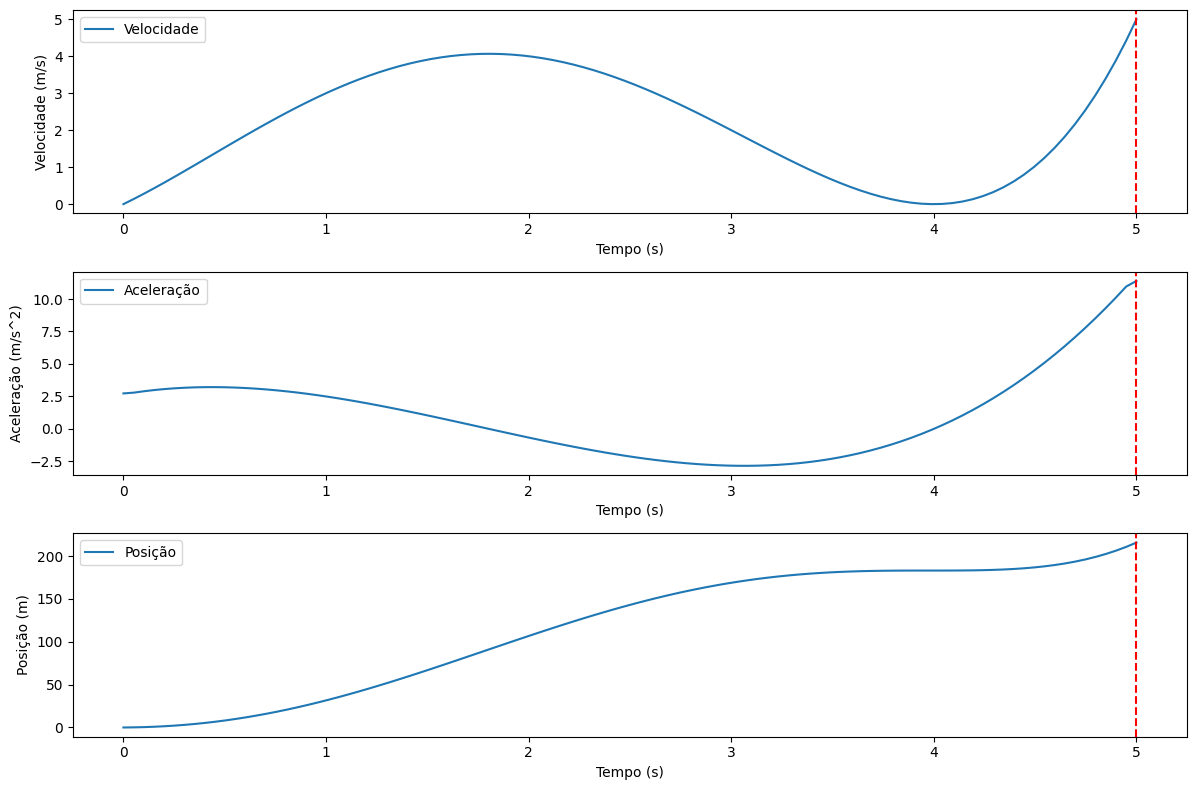

In [8]:
# Dados do tempo e velocidade
tempo = [0, 1, 2, 3, 4]
velocidade = [0, 3, 4, 2, 0]

# Função para encontrar o polinômio de Lagrange
polinomio = sc.lagrange(tempo, velocidade)

# Define o intervalo de tempo para traçar os gráficos
t = np.linspace(0, 5, 100)

# Calcula a velocidade, aceleração e posição em relação ao tempo
velocidade_interp = polinomio(t)
aceleracao_interp = np.gradient(velocidade_interp, t)
posicao_interp = np.cumsum(velocidade_interp)

# Traçar os gráficos
plt.figure(figsize=(12, 8))

# Gráfico de velocidade
plt.subplot(3, 1, 1)
plt.plot(t, velocidade_interp, label='Velocidade')
plt.axvline(x=5, linestyle='--', color='r')
plt.legend()
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')

# Gráfico de aceleração
plt.subplot(3, 1, 2)
plt.plot(t, aceleracao_interp, label='Aceleração')
plt.axvline(x=5, linestyle='--', color='r')
plt.legend()
plt.xlabel('Tempo (s)')
plt.ylabel('Aceleração (m/s^2)')

# Gráfico de posição
plt.subplot(3, 1, 3)
plt.plot(t, posicao_interp, label='Posição')
plt.axvline(x=5, linestyle='--', color='r')
plt.legend()
plt.xlabel('Tempo (s)')
plt.ylabel('Posição (m)')

plt.tight_layout()
plt.show()


# Questão 3

Um engenheiro está projetando uma barragem de concreto com a forma de um trapézio retângulo. O projeto do perfil da barragem, olhando de lado, é dado pela função $f(x) = a + b\sin\left(\frac{\pi x}{H}\right)$, onde $x$ é a altura acima da base (em metros), $a$ é a altura mínima da barragem (em metros), e $b$ é a amplitude da variação do perfil (em metros). Por razões de segurança, o perfil da barragem varia sinusoidalmente de $a$ até $a + b$ ao longo da altura.

O engenheiro precisa calcular o volume de concreto necessário para construir a barragem. Ele sabe que o comprimento da barragem é de $L$ metros e que o perfil é o mesmo em todo o seu comprimento.

Ele decide então modelar o volume de concreto necessário como a integral da função $f(x)$, de $0$ até a altura máxima $H$, multiplicada pelo comprimento $L$.

Dadas as seguintes informações:

- $a = 10$ metros
- $b = 5$ metros
- $H = 20$ metros
- $L = 100$ metros

Calcule o volume de concreto necessário para a construção da barragem e trace o gráfico da função que descreve o perfil da barragem e sombreie a área sob a curva que representa o volume de concreto.



'Volume do concreto necessário 26366.197723675818'

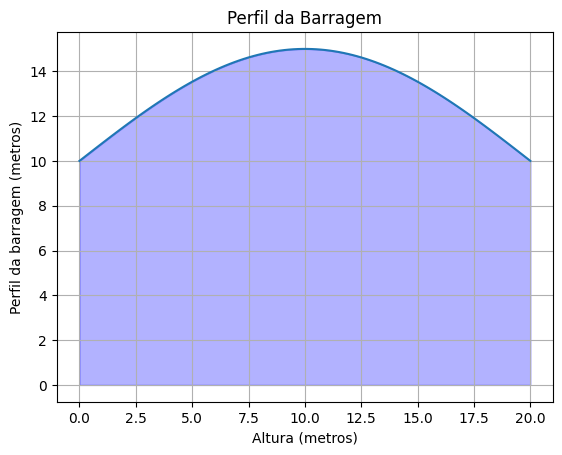

In [9]:
a = 10
b = 5
H = 20
L = 100

def f(x):
  return a + b * sy.sin((sy.pi*x)/H)

x = sy.symbols(' x ')
integral = sy.integrate(f(x), (x, 0,H))
integral_value = float(integral)
display(f'Volume do concreto necessário {integral_value * L}')

x1 = x = np.linspace(0, H, 100)
y = a + b * np.sin((np.pi*x)/H)

plt.plot(x1, y)
plt.fill_between(x, y, where=(y >= 0) & (x <= integral_value*L), color='blue', alpha=0.3)
plt.xlabel('Altura (metros)')
plt.ylabel('Perfil da barragem (metros)')
plt.title('Perfil da Barragem')
plt.grid(True)
plt.show()
